In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
train = pd.read_csv("final_train_data.csv",index_col = 0)
train.head()

,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [49]:
train.shape

(4506, 8)

In [50]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Name,4506,150,Israel,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,4506,150,ISR,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4506,NaN,NaN,NaN,1996.32,12.1963,1960,1986,1997,2007,2016
Balance,4506,NaN,NaN,NaN,-5.13203e+08,3.56101e+10,-8.06e+11,-9.81187e+08,-1.60329e+08,2.88525e+07,4.21e+11
Inflation,4261,NaN,NaN,NaN,31.6135,353.818,-29.6911,2.4,6.18435,12.4097,13611.6
GDP,4262,NaN,NaN,NaN,3.64122,4.85098,-62.0759,1.48104,3.79997,6.05023,34.5
Exports,4490,NaN,NaN,NaN,4.33961e+10,1.44544e+11,2e+06,4.80426e+08,2.93014e+09,2.04478e+10,2.34e+12
Trade,4304,NaN,NaN,NaN,62.8893,46.754,7.92091,38.0963,52.4365,76.7458,957.784


In [51]:
train.describe()

,Year,Balance,Inflation,GDP,Exports,Trade
count,4506.000000,4.506000e+03,4261.000000,4262.000000,4.490000e+03,4304.000000
mean,1996.315135,-5.132031e+08,31.613464,3.641224,4.339613e+10,62.889312
std,12.196291,3.561007e+10,353.817965,4.850978,1.445441e+11,46.753985
min,1960.000000,-8.060000e+11,-29.691067,-62.075920,2.000000e+06,7.920909
25%,1986.000000,-9.811873e+08,2.400000,1.481036,4.804255e+08,38.096321
50%,1997.000000,-1.603287e+08,6.184351,3.799969,2.930136e+09,52.436512
75%,2007.000000,2.885250e+07,12.409709,6.050231,2.044775e+10,76.745788
max,2016.000000,4.210000e+11,13611.634820,34.500000,2.340000e+12,957.784011


In [52]:
train.isnull().sum()

Country Name      0
Country Code      0
Year              0
Balance           0
Inflation       245
GDP             244
Exports          16
Trade           202
dtype: int64

In [53]:
columns=['Country Name','Country Code','Year', 'Balance','Inflation', 'GDP','Exports','Trade']
for i in columns:
    print('For the feature',i, 'there are',len(train[i].unique()),'values')
    print()
    print(train[i].unique())
    print('--------------------------')
    print()

For the feature Country Name there are 150 values

['Senegal' 'Togo' 'Pakistan' 'Nepal' 'Malta' 'Israel' 'Argentina'
 'Botswana' 'Thailand' 'Swaziland' 'Tanzania' 'Congo, Rep.' 'Fiji'
 'Uganda' 'Seychelles' 'Burundi' 'Barbados' 'Saudi Arabia' 'Colombia'
 'Kuwait' 'Grenada' 'Denmark' 'Estonia' 'Guinea-Bissau' 'Greece' 'Canada'
 'Tonga' 'Bolivia' 'Antigua and Barbuda' 'El Salvador' 'Tunisia'
 'Netherlands' 'Trinidad and Tobago' 'Egypt, Arab Rep.' 'Malaysia' 'Libya'
 'St. Vincent and the Grenadines' 'Kiribati' 'Namibia' 'Germany' 'Lesotho'
 'Maldives' 'St. Lucia' 'Panama' 'Algeria' 'Zambia' 'Brazil' 'Lao PDR'
 'Ukraine' 'Guyana' 'Benin' 'Costa Rica' 'Sweden' 'Singapore' 'Niger'
 'Paraguay' 'Poland' 'Korea, Rep.' 'India' 'St. Kitts and Nevis'
 'Cambodia' 'Japan' 'Bangladesh' 'Dominican Republic' 'Aruba'
 'Bahamas, The' 'Cabo Verde' 'United Kingdom' 'Azerbaijan'
 'Solomon Islands' 'Ethiopia' 'Slovenia' 'Gambia, The' 'Hungary' 'Mali'
 'Honduras' 'Madagascar' 'Mexico' 'Armenia' 'Cameroon' 'Mo

In [54]:
#train['Exports'] = train['Exports'].apply(lambda x : round(x,4))

In [55]:
#train.head(2)

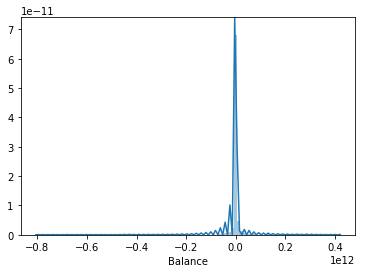

In [56]:
sns.distplot(train['Balance'],bins=100)

In [57]:
train['GDP_Growth']=train['GDP']-train['Inflation']
train['Exports_TradeOff']=(1-train['Trade']/100)*train['Exports']

In [58]:
train.shape

n_columns=['Inflation', 'GDP', 'Exports', 'Trade', 'GDP_Growth','Exports_TradeOff']

In [59]:
train.head(2)

,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade,GDP_Growth,Exports_TradeOff
0,Senegal,SEN,1983,-304382939.0,9.274213,-5.326393,618000000.0,59.224298,-14.600606,2.519938e+08
1,Togo,TGO,2009,-176669246.3,1.855275,3.510297,903026000.0,76.242542,1.655022,2.145360e+08


In [60]:
for i in n_columns:
    train[i].fillna(train[i].mean(),inplace = True)

In [61]:
train.isnull().sum()

Country Name        0
Country Code        0
Year                0
Balance             0
Inflation           0
GDP                 0
Exports             0
Trade               0
GDP_Growth          0
Exports_TradeOff    0
dtype: int64

In [62]:
from sklearn.preprocessing import RobustScaler,StandardScaler,Normalizer
train[n_columns]=RobustScaler().fit_transform(train[n_columns])

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4506 entries, 0 to 5703
Data columns (total 10 columns):
Country Name        4506 non-null object
Country Code        4506 non-null object
Year                4506 non-null int64
Balance             4506 non-null float64
Inflation           4506 non-null float64
GDP                 4506 non-null float64
Exports             4506 non-null float64
Trade               4506 non-null float64
GDP_Growth          4506 non-null float64
Exports_TradeOff    4506 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 387.2+ KB


In [64]:
#sns.pairplot(train)

In [65]:
train.head(2)

,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade,GDP_Growth,Exports_TradeOff
0,Senegal,SEN,1983,-304382939.0,0.218946,-2.093427,-0.115420,0.146618,-0.891716,-0.050848
1,Togo,TGO,2009,-176669246.3,-0.403319,-0.030564,-0.101508,0.612021,0.358476,-0.054379


In [66]:
train.isnull().sum()

Country Name        0
Country Code        0
Year                0
Balance             0
Inflation           0
GDP                 0
Exports             0
Trade               0
GDP_Growth          0
Exports_TradeOff    0
dtype: int64

In [67]:
categorical_features_indices = np.where(train.dtypes =='object')[0]
categorical_features_indices

array([0, 1], dtype=int64)

In [68]:
build = train.drop('Balance',axis=1)
build.head()

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade,GDP_Growth,Exports_TradeOff
0,Senegal,SEN,1983,0.218946,-2.093427,-0.115420,0.146618,-0.891716,-0.050848
1,Togo,TGO,2009,-0.403319,-0.030564,-0.101508,0.612021,0.358476,-0.054379
2,Pakistan,PAK,1992,0.284610,0.948869,0.213215,-0.529813,0.050365,0.379375
3,Nepal,NPL,1988,0.432082,0.946748,-0.136311,-0.789914,-0.085556,-0.061166
5,Malta,MLT,2016,-0.424349,0.437797,0.001689,0.818190,0.532061,-0.028471


In [69]:
labels = train.iloc[:,3]
labels.head()

0   -3.043829e+08
1   -1.766692e+08
2   -1.876092e+09
3   -2.714506e+08
5    7.269132e+08
Name: Balance, dtype: float64

In [70]:
from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor

In [71]:
###pip install catboost

In [72]:
model = CatBoostRegressor(n_estimators=1000,learning_rate=0.1,loss_function='RMSE',eval_metric='RMSE',random_seed=1994,od_type='Iter',
od_wait=50)
model.fit(build,labels,cat_features=categorical_features_indices,use_best_model=False,verbose=False)

In [73]:
y_predict = model.predict(build)
y_predict

array([-1.42231848e+08,  2.24288006e+08, -1.76416882e+09, ...,
        9.87091165e+08, -9.42790024e+08,  4.25183081e+08])

# Test Set

In [74]:
test = pd.read_csv("final_test_data.csv",index_col=0)
test.head()

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade
0,Cyprus,CYP,2001,3.657166,3.600665,9.760000e+08,46.359979
1,Benin,BEN,1995,15.099452,6.045199,4.200000e+08,53.726740
2,Bangladesh,BGD,1995,7.144939,5.121278,3.501000e+09,26.871554
3,Paraguay,PRY,1978,9.706191,12.028730,2.569700e+08,27.230654
4,Morocco,MAR,1987,3.014808,-0.325004,2.826000e+09,32.418633


In [75]:
test.isnull().sum()

Country Name    0
Country Code    0
Year            0
Inflation       0
GDP             0
Exports         0
Trade           0
dtype: int64

In [76]:
test['GDP_Growth']=test['GDP']-test['Inflation']
test['Exports_TradeOff']=(1-test['Trade']/100)*test['Exports']

In [77]:
test.shape

#n_cols=['Inflation', 'GDP', 'Exports', 'Trade', 'GDP_Growth','Exports_TradeOff']

(1071, 9)

In [78]:
test.head(2)

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade,GDP_Growth,Exports_TradeOff
0,Cyprus,CYP,2001,3.657166,3.600665,976000000.0,46.359979,-0.056501,5.235266e+08
1,Benin,BEN,1995,15.099452,6.045199,420000000.0,53.726740,-9.054253,1.943477e+08


In [79]:
from sklearn.preprocessing import RobustScaler,StandardScaler,Normalizer
test[n_columns]=RobustScaler().fit_transform(test[n_columns])

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 0 to 1070
Data columns (total 9 columns):
Country Name        1071 non-null object
Country Code        1071 non-null object
Year                1071 non-null int64
Inflation           1071 non-null float64
GDP                 1071 non-null float64
Exports             1071 non-null float64
Trade               1071 non-null float64
GDP_Growth          1071 non-null float64
Exports_TradeOff    1071 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 83.7+ KB


In [81]:
categorical_features_indices1 = np.where(test.dtypes =='object')[0]
categorical_features_indices1

array([0, 1], dtype=int64)

In [82]:
answer = model.predict(test)
answer

array([-2.47732040e+09,  8.57554235e+08, -1.69103446e+08, ...,
        1.43739312e+08,  1.40905290e+08,  5.65161802e+08])

In [83]:
answer_df = pd.DataFrame(answer)
answer_df.columns=['Balance']
answer_df.head()

,Balance
0,-2.477320e+09
1,8.575542e+08
2,-1.691034e+08
3,-9.280676e+08
4,-1.924585e+09


In [84]:
len(answer_df)

1071

In [86]:
test1 = pd.concat([test,answer_df],axis =1)
test1.shape

(1071, 10)

In [91]:
Excel = pd.ExcelWriter('Answer.xlsx')
answer_df.to_excel(Excel,'Answer',index = False)
Excel.save()